In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import shutil

# Path to the file in Google Drive
file_path = '/content/drive/My Drive/Spectrograms_Drones.zip'

# Destination path in /content/
destination_path = '/content/Spectrograms_Drones.zip'

# Copy the file
shutil.copy(file_path, destination_path)


'/content/Spectrograms_Drones.zip'

In [3]:
import zipfile

zip_path = 'Spectrograms_Drones.zip'  # Replace with the path to your zip file
extract_to = '/content/'  # Replace with the directory where you want to extract the contents

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Extracted '{zip_path}' to '{extract_to}'")


Extracted 'Spectrograms_Drones.zip' to '/content/'


In [4]:
pip install split-folders

In [5]:
import numpy as np
import splitfolders
import tensorflow.keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.losses import categorical_crossentropy
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

splitfolders.ratio('/content/Spectrograms_Drones',output='/content/datasplit', seed=1337, ratio=(0.7,0.2,0.1),group_prefix=None, move=False)

class_names=["elsec","mavic_classic","mavic_pro","phantom_pro"]

#weights_path = 'E:/Drone_Signal_Classification/WITH_NOISE/Elsec_Dataset/weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'


datagen = ImageDataGenerator(rescale = 1./255)

train_generator = datagen.flow_from_directory(
    directory = "/content/datasplit/train",
    classes = class_names,
    target_size = (224,224),
    batch_size = 8,
    class_mode = "categorical",
    subset="training"
)


valid_generator = datagen.flow_from_directory(
    directory = "/content/datasplit/val",
    classes = class_names,
    target_size = (224,224),
    batch_size = 8,
    class_mode = "categorical",
)

test_generator = datagen.flow_from_directory(
    directory = "/content/datasplit/test",
    classes = class_names,
    target_size = (224,224),
    batch_size = 4,
    class_mode = "categorical",
)


model_vgg16 = VGG16(input_shape=(224,224,3),include_top = False,weights ="imagenet")

for layer in model_vgg16.layers:
  layer.trainable=False


model = Sequential()
model.add(model_vgg16)
model.add(Flatten())
model.add(Dense(512,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4,activation ="softmax"))

model.summary()

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics =["accuracy"])



Copying files: 3204 files [00:02, 1353.43 files/s]


Found 2240 images belonging to 4 classes.
Found 640 images belonging to 4 classes.
Found 324 images belonging to 4 classes.
58889256/58889256 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 

In [6]:
history = model.fit(train_generator,validation_data = valid_generator,epochs = 25)

Epoch 1/25
280/280 [==============================] - 25s 67ms/step - loss: 0.4227 - accuracy: 0.8902 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 2/25
280/280 [==============================] - 18s 63ms/step - loss: 0.0249 - accuracy: 0.9969 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3/25
280/280 [==============================] - 18s 65ms/step - loss: 0.0092 - accuracy: 0.9991 - val_loss: 5.5647e-04 - val_accuracy: 1.0000
Epoch 4/25
280/280 [==============================] - 18s 64ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 2.5117e-04 - val_accuracy: 1.0000
Epoch 5/25
280/280 [==============================] - 20s 70ms/step - loss: 0.0865 - accuracy: 0.9710 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 6/25
280/280 [==============================] - 18s 65ms/step - loss: 0.0888 - accuracy: 0.9679 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 7/25
280/280 [==============================] - 18s 64ms/step - loss: 0.0949 - accuracy: 0.9594 - val_loss: 0.0015 - val_a

In [7]:
test_loss, test_acc = model.evaluate(test_generator)
print("test loss: ", test_loss)
print("test accuracy: ", test_acc*100)

81/81 [==============================] - 4s 27ms/step - loss: 0.0281 - accuracy: 1.0000
test loss:  0.028078844770789146
test accuracy:  100.0


In [ ]:
import os
import glob

# Set the path to your folder
folder_path = '/content/datasplit/test/elsec'

# Loop through all files in the folder
for filename in glob.glob(os.path.join(folder_path, '*')):
    print('Processing file:', filename)


In [ ]:
from tensorflow.keras.preprocessing import image


results = []
folder_path = '/content/datasplit/test/mavic_classic'
for filename in glob.glob(os.path.join(folder_path, '*')):
    img_path = filename
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0

    y_pred = model.predict(img_array)
    predicted_class_index = np.argmax(y_pred, axis=1)
    results.append(predicted_class_index[0])
print(results)

In [11]:
class_names=["1.elsec","2.mavic_classic","3.mavic_pro","4.phantom_pro"]
test_generator = datagen.flow_from_directory(
    directory = "/content/datasplit/test",
    classes = class_names,
    target_size = (224,224),
    batch_size = 4,
    class_mode = "categorical",
    shuffle = False
)

Found 324 images belonging to 4 classes.


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
81/81 [==============================] - 3s 30ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

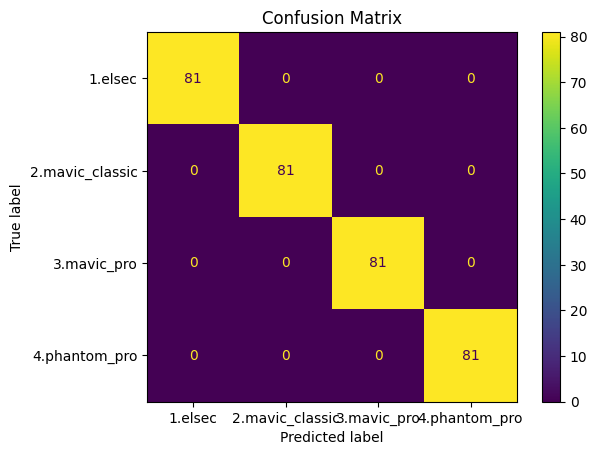

In [12]:



y_true =test_generator.classes
print(y_true)
y_pred=model.predict(test_generator)
y_pred=np.argmax(y_pred,axis=1)
print(y_pred)
cm=confusion_matrix(y_true, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [13]:
model.save('/content/VGG16_model_for_Drone_With_Noise_new.keras',save_format='tf')

In [14]:
model.save('VGG16_Drone_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
file_path = '/content/drive/My Drive/test.zip'

# Destination path in /content/
destination_path = '/content/test.zip'

# Copy the file
shutil.copy(file_path, destination_path)

'/content/test.zip'

In [ ]:
zip_path = 'test.zip'  # Replace with the path to your zip file
extract_to = '/content/'  # Replace with the directory where you want to extract the contents

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Extracted '{zip_path}' to '{extract_to}'")

Extracted 'test.zip' to '/content/'


In [17]:
from sklearn.metrics import precision_score,recall_score

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Precision: 1.00
Recall: 1.00
